# Pyber

We analyze data of the Pyber ride sharing service. We are provided with per-city data describing type of the region (urban, suburban, rural), and total driver count. We are also provided with per-ride data, detailing ride city, fare, ride_id, and date. Unfortunately, ride distance is not available.

Based on our analysis, we draw the following tentative conclusions:

* Rural regions have the largest spread in average fares, most likely because typical distances between points of interests vary wildly in rural regions.

* Urban regions have the lowest average fares, most likely because the distances between points of interest are smaller than in suburban and rural regions. From a business perspective, I'd probably recommend introducing a time component in the fare calculation to adjust for time in which rides are stuck in traffic. Based on the provided data, it could be that such a component is currently missing.

* Urban regions have the largest number of rides and the highest driver counts. Rural regions have the lowest number of rides and the lowest number of drivers, but reach the highest average fares, due most likely to the large distances in rural regions.

* Suburban regions fall in between rural and urban regions, but they largely overlap with the urban regions in the number of rides taken per city. Average fares are systematically higher than in urban regions, most likely because of the larger distances traveled per ride. Unfortunately, distance information is not available in the provided dataset.

* While most of the rides and most of the revenue is generated in urban regions, city drivers on average earn less than drivers in suburban and rural regions. This is again due to the shorter distances traveled in cities. Comparing the fractions of total fares and drivers, we find that a driver in a suburban or rural region earns more than twice as much as a driver in urban regions.




In [202]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# set up some matplotlib parameters
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['legend.fontsize'] = 24
rcParams['axes.labelsize'] = 24

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_city,df_ride,on='city',how='outer')
# Display the data table for preview
df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [203]:
# check if we have any nans:
len(df[df.isnull().any(axis=1)])

0

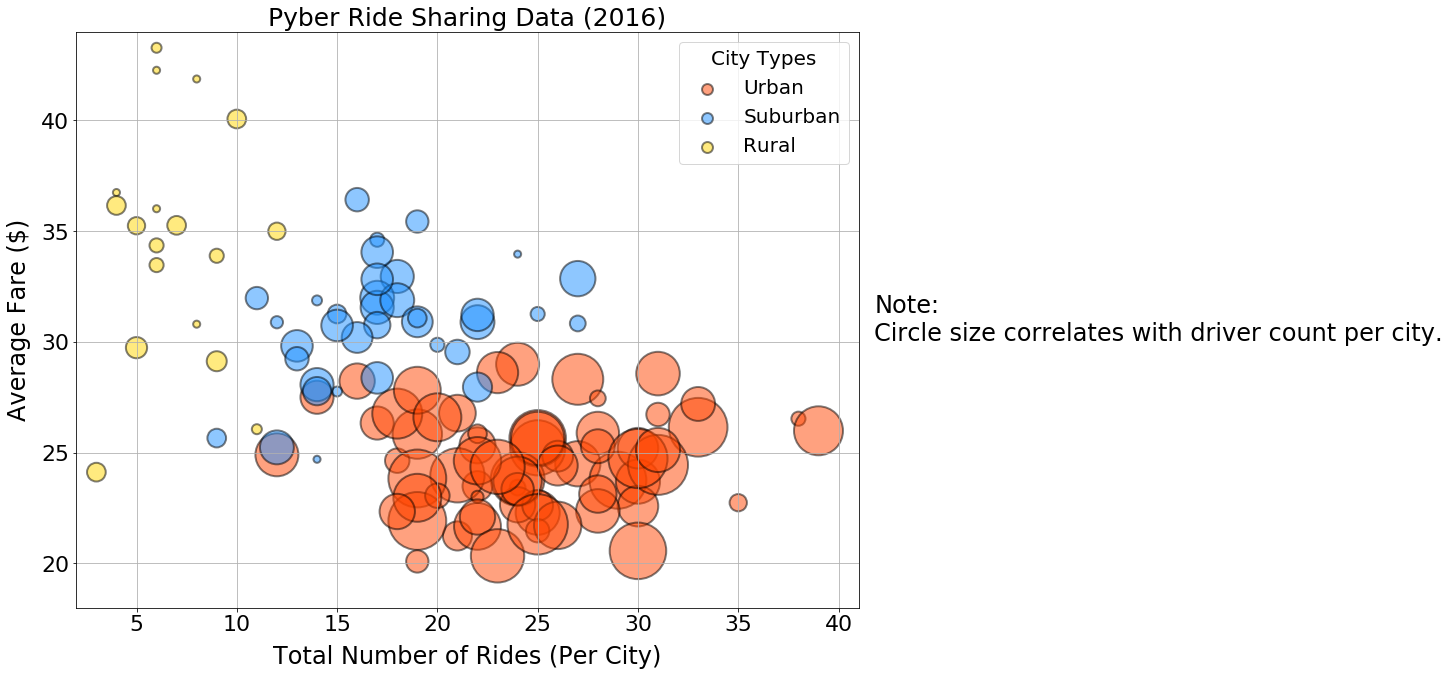

In [204]:
# Obtain the x and y coordinates for each of the three city types

# first get driver count for each city
df_group = df.groupby(['city','type'])
df_avg = (df_group.mean().reset_index())
df_count = (df_group.count()).reset_index()

df_res = pd.merge(df_avg,df_count,on='city')
df_res.rename(columns={'type_x':'type', 'fare_x':'avg_fare', 
                       'ride_id_y':'total_rides', 
                       'driver_count_x':'driver_count'},inplace=True)
df_urban = df_res[ ['total_rides','avg_fare', 'driver_count'] ].loc[ df_res['type'] == 'Urban']
df_suburb = df_res[ ['total_rides','avg_fare', 'driver_count'] ].loc[ df_res['type'] == 'Suburban']
df_rural = df_res[ ['total_rides','avg_fare', 'driver_count'] ].loc[ df_res['type'] == 'Rural']

# Build the scatter plots for each city types
# first set up figure
myfig = plt.figure(figsize=(20.5,10))
myfig.subplots_adjust(left=0.05)
myfig.subplots_adjust(bottom=0.12)
myfig.subplots_adjust(top=0.92)
myfig.subplots_adjust(right=0.58)
ax = plt.gca()

# do the plotting
scale = 50
plt.scatter(df_urban['total_rides'],df_urban['avg_fare'],s=df_urban['driver_count']*scale,
           alpha=0.5,lw=2,edgecolors='k',color='orangered',label="Urban")
plt.scatter(df_suburb['total_rides'],df_suburb['avg_fare'],s=df_suburb['driver_count']*scale,
           alpha=0.5,lw=2,edgecolors='k',color='dodgerblue',label="Suburban")
plt.scatter(df_rural['total_rides'],df_rural['avg_fare'],s=df_rural['driver_count']*scale,
           alpha=0.5,lw=2,edgecolors='k',color='gold',label="Rural")
myleg = plt.legend(title="City Types",fontsize=20)
# fix marker size
myleg.legendHandles[0]._sizes = [120]
myleg.legendHandles[1]._sizes = [120]
myleg.legendHandles[2]._sizes = [120]
# fix title size
plt.setp(myleg.get_title(),fontsize=20)

# more annotations
plt.title("Pyber Ride Sharing Data (2016)",fontsize=25)
plt.xlabel("Total Number of Rides (Per City)",labelpad=10)
plt.ylabel("Average Fare ($)",labelpad=10)

plt.text(1.02, 0.5, 'Note:\nCircle size correlates with driver count per city.', horizontalalignment='left', 
         verticalalignment='center', transform=ax.transAxes, fontsize=24)

plt.grid()
plt.ylim(18,44)
plt.xlim(2,41)
# save the figure
plt.savefig('PyberRideSharingData.png')
# Show plot
plt.show()

In [205]:
# Show plot
plt.show()

## Total Fares by City Type

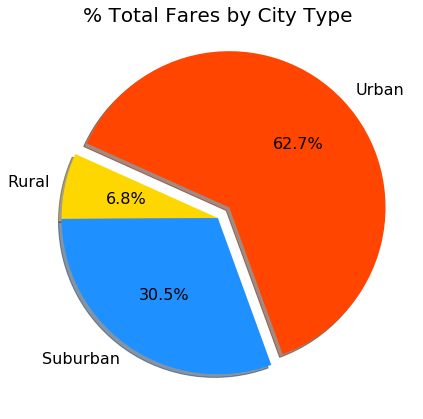

In [206]:
# Calculate Type Percents
total = df['fare'].sum()
urban_fares = df['fare'].loc[ df['type'] == 'Urban' ].sum()/total
suburban_fares = df['fare'].loc[ df['type'] == 'Suburban' ].sum()/total
rural_fares = df['fare'].loc[ df['type'] == 'Rural' ].sum()/total


# Build Pie Chart
myfig = plt.figure(figsize=(7,7))
plt.axis('equal')

pies = ["Urban", "Rural", "Suburban"]
pie_data = [urban_fares,rural_fares,suburban_fares]
colors = ['orangered','gold','dodgerblue']
explode = (0.1,0,0)
plt.pie(pie_data,explode=explode,labels=pies,colors=colors,autopct="%.1f%%",
       shadow=True,startangle=290,textprops={'fontsize': 16})
plt.title('% Total Fares by City Type',fontsize=20)
# Save Figure
plt.savefig("PyberTotalFaresByCity.png")
plt.show()

## Total Rides by City Type

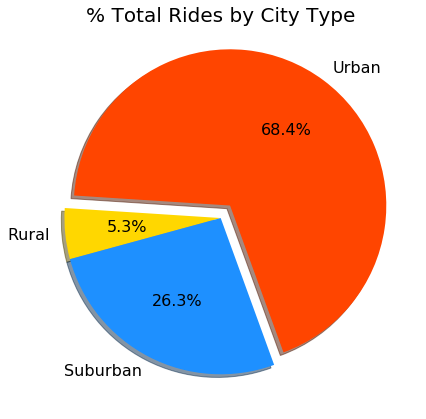

In [207]:
# Calculate Ride Percents
total = df['fare'].count()
urban_rides = df['fare'].loc[ df['type'] == 'Urban' ].count()/total
suburban_rides = df['fare'].loc[ df['type'] == 'Suburban' ].count()/total
rural_rides = df['fare'].loc[ df['type'] == 'Rural' ].count()/total


# Build Pie Chart
myfig = plt.figure(figsize=(7,7))
plt.axis('equal')

pies = ["Urban", "Rural", "Suburban"]
pie_data = [urban_rides,rural_rides,suburban_rides]
colors = ['orangered','gold','dodgerblue']
explode = (0.1,0,0)
plt.pie(pie_data,explode=explode,labels=pies,colors=colors,autopct="%.1f%%",
       shadow=True,startangle=290,textprops={'fontsize': 16})
plt.title('% Total Rides by City Type',fontsize=20)
# Save Figure
plt.savefig("PyberTotalRidesByCity.png")
plt.show()


## Total Drivers by City Type

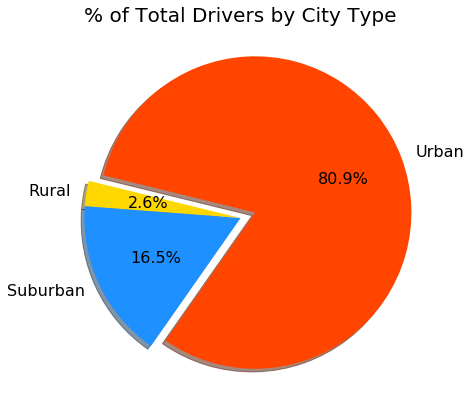

In [208]:
# Calculate Driver Percents
total = df_city['driver_count'].sum()
urban = df_city['driver_count'].loc[ df_city['type'] == 'Urban' ].sum()/total
suburban = df_city['driver_count'].loc[ df_city['type'] == 'Suburban' ].sum()/total
rural = df_city['driver_count'].loc[ df_city['type'] == 'Rural' ].sum()/total


# Build Pie Charts
myfig = plt.figure(figsize=(7,7))
plt.axis('equal')

pies = ["Urban", "Rural", "Suburban"]
pie_data = [urban,rural,suburban]
colors = ['orangered','gold','dodgerblue']
explode = (0.1,0,0)
plt.pie(pie_data,explode=explode,labels=pies,colors=colors,autopct="%.1f%%",
       shadow=True,startangle=235,textprops={'fontsize': 16})
plt.title('% of Total Drivers by City Type',fontsize=20)
# Save Figure
plt.savefig("PyberTotalDriversByCity.png")
plt.show()